In [51]:
import math
import random
#Benötigte Pakete

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Circle 

import matplotlib.mlab as mlab
import numpy as np
import cmath

from numpy import linalg as LA
import scipy
from scipy import spatial
import time
from scipy import stats
#import tables

import os
#import h5py

from matplotlib import animation
import matplotlib
from scipy.optimize import curve_fit
from matplotlib import rc
import os

import gc
import sys
gc.enable()
import copy

from mpl_toolkits import mplot3d

plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)

In [52]:
#a=np.meshgrid(densities, eigenvalues)
a=np.array([1,2,3,4])                              #wie density
b=np.zeros(3)   #wie eigenvalues
c,d=np.meshgrid(b.flatten(),a)

print(c)
print(d)
#plt.plot(dens,eigenvalues.flatten(), 'k.', markersize=2)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]


# Einlesen

In [96]:
global number_atoms
global radius
global r_b
coupling_constant= -2.72*10**9  #stärke der nachbarwechselwirkung
r_b = 2.5

#Parameter:
number_atoms=1000
densities= np.arange(0.01,0.53,0.01)
radiusse = (np.sqrt(number_atoms*r_b**2/densities))
iteration=5000



density=0.5
data = open("Results/Eigenstates/nr_atoms_"+str(number_atoms)+"/dens_"+str(np.round(density,3))+".npy","rb")
np.load(data)
np.load(data)
np.load(data)
np.load(data)
eigenvalues = np.load(data)

x_min=min(eigenvalues)
x_max=max(eigenvalues)
ipr_min= 0
ipr_max= 1
pr_min= 0
pr_max= number_atoms

hist_eigs=[[]for i in range(len(densities))]
hist_ipr=[[]for i in range(len(densities))]
hist_pr=[[]for i in range(len(densities))]

bin_means_ipr=[[] for i in range(len(densities))]
bin_means_pr=[[] for i in range(len(densities))]

bin_means_ratios=[[] for i in range(len(densities))]
bin_means_ratios=[[] for i in range(len(densities))]

bins=1000
bin_array=np.linspace(x_min,x_max,bins)

for i,density in enumerate(densities):
    data = open("Results/Eigenstates/nr_atoms_"+str(number_atoms)+"/dens_"+str(np.round(density,3))+".npy","rb")
    text            = np.load(data)
    if density <=0.5:
        gebrauchte_zeit = np.load(data)
    ipr             = np.load(data)
    ratios_tmp      = np.load(data)
    eigenvalues     = np.load(data)
    
    index= np.argwhere(ratios_tmp==-1)
    ratios=np.delete(ratios_tmp,index)
    eigenvalues_ratios=np.delete(eigenvalues,index)
    
    if density>0.5:
        iteration=300
    
    hist_eigs[i], bin_edges_eigs= np.histogram(eigenvalues, range=(x_min, x_max), bins=1000,weights=np.ones_like(eigenvalues)/iteration)
    hist_ipr[i], bin_edges_ipr= np.histogram(ipr, range=(ipr_min, ipr_max), bins=1000,weights=np.ones_like(ipr)/iteration)
    hist_pr[i], bin_edges_pr= np.histogram(1/ipr, range=(pr_min, pr_max), bins=1000,weights=np.ones_like(ipr)/iteration)


    bin_means_ipr[i], bin_edges_ipr, binnumber_ipr = stats.binned_statistic(eigenvalues,
                    ipr, statistic='mean',bins=bin_array)
    bin_means_pr[i], bin_edges_pr, binnumber_pr = stats.binned_statistic(eigenvalues,
                    1/ipr, statistic='mean', bins=bin_array)
    
    bin_means_ratios[i], bin_edges_ratios, binnumber_ratios = stats.binned_statistic(eigenvalues_ratios,
                    ratios, statistic='mean', bins=bin_array)

In [ ]:
#nochmal ratios

In [89]:
for i,density in enumerate(densities):
    data = open("Results/Eigenstates/nr_atoms_"+str(number_atoms)+"/dens_"+str(np.round(density,3))+".npy","rb")
    text            = np.load(data)
    if density <=0.5:
        gebrauchte_zeit = np.load(data)
    ipr             = np.load(data)
    ratios_tmp      = np.load(data)
    eigenvalues     = np.load(data)
    
    index= np.argwhere(ratios_tmp==-1)
    ratios=np.delete(ratios_tmp,index)
    eigenvalues_ratios=np.delete(eigenvalues,index)
    
    
    bin_means_ipr[i], bin_edges_ipr, binnumber_ipr = stats.binned_statistic(eigenvalues,
                    ipr, statistic='mean',bins=bin_array)
    bin_means_pr[i], bin_edges_pr, binnumber_pr = stats.binned_statistic(eigenvalues,
                    1/ipr, statistic='mean', bins=bin_array)
    
    bins=800
    bin_array=np.linspace(x_min,x_max,bins)
    bin_means_ratios[i], bin_edges_ratios, binnumber_ratios = stats.binned_statistic(eigenvalues_ratios,
                    ratios, statistic='mean', bins=bin_array)

In [54]:
dens=np.zeros((len(densities)*number_atoms*iteration))
k=0
for density in densities:
    for i in range(number_atoms*iteration):
        dens[i+k*number_atoms*iteration]=density
    k+=1
    
b=np.zeros(number_atoms*iteration)
c,d=np.meshgrid(b,densities)
dens_mesh=d.ravel() 

for i in range(len(zeiten)):
        zeiten[i]=zeiten[i].replace("t","")
        zeiten[i]=zeiten[i].replace("=","")
zeiten = np.array(zeiten).astype(np.float)

AttributeError: 'list' object has no attribute 'replace'

In [ ]:
np.sum(zeiten/60/60)/iteration*10000/24
#np.sum(gebrauchte_zeit)/3


# 1. DOS

Text(0, 0.5, 'Densities')

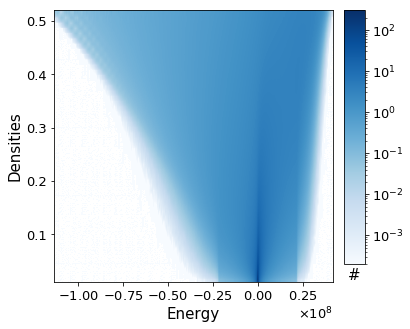

In [61]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

fig, ax = plt.subplots(figsize=(5,5))

ax.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)

im = ax.imshow(hist_eigs, extent=[x_min,x_max,min(densities),max(densities)], interpolation="bilinear", cmap="Blues",
               origin='lower',norm=matplotlib.colors.LogNorm())
ax.set_aspect("auto")

#divider = make_axes_locatable(ax)
#cax = divider.append_axes('right', size='5%', pad=0.1)

cax = fig.add_axes([ax.get_position().x1+0.03,ax.get_position().y0+0.05,0.06,ax.get_position().height-0.05])
fig.colorbar(im,cax = cax, cmap="Blues")
cax.set_xlabel("#", fontsize=15)


ax.set_xlabel("Energy", fontsize=15)
ax.set_ylabel("Densities", fontsize=15)

#fig.savefig("figures/Eigenstates/DOS_all.png",bbox_inches = "tight")

## 2. Histogram IPR /PR

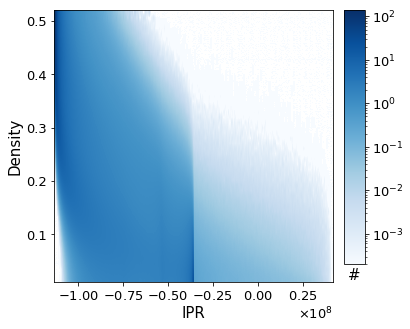

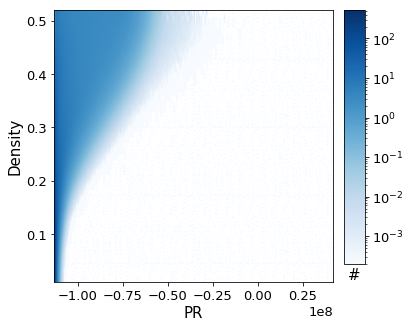

In [62]:
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(hist_ipr, extent=[x_min,x_max,min(densities),max(densities)], interpolation="bilinear", cmap="Blues",
               origin='lower',norm=matplotlib.colors.LogNorm())
ax.set_aspect("auto")
ax.set_xlabel("IPR", fontsize=15)
ax.set_ylabel("Density", fontsize=15)
ax.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)

cax = fig.add_axes([ax.get_position().x1+0.03,ax.get_position().y0+0.05,0.06,ax.get_position().height-0.05])
fig.colorbar(im,cax = cax, cmap="Blues")
cax.set_xlabel("#", fontsize=15)

#fig.savefig("figures/Eigenstates/IPR_hist_all.png",bbox_inches = "tight")
plt.show()

#------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(hist_pr, extent=[x_min,x_max,min(densities),max(densities)], interpolation="bilinear", cmap="Blues",
               origin='lower',norm=matplotlib.colors.LogNorm())
ax.set_aspect("auto")
ax.set_xlabel("PR", fontsize=15)
ax.set_ylabel("Density", fontsize=15)
#ax.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)

cax = fig.add_axes([ax.get_position().x1+0.03,ax.get_position().y0+0.05,0.06,ax.get_position().height-0.05])
fig.colorbar(im,cax = cax, cmap="Blues")
cax.set_xlabel("#", fontsize=15)

#fig.savefig("figures/Eigenstates/PR_hist_all.png",bbox_inches = "tight")
plt.show()


# 3. Binning IPR

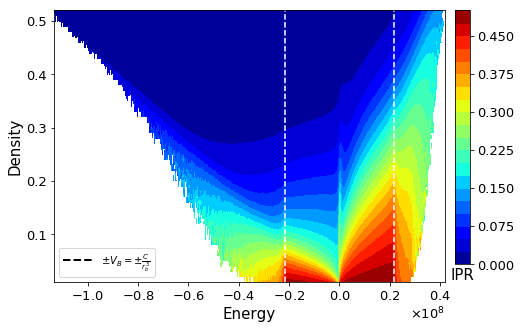

In [100]:
fig, ax = plt.subplots(figsize=(7,5))

ax.set_xlabel("Energy", fontsize=15)
ax.set_ylabel("Density", fontsize=15)
ax.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)

im = ax.contourf(bin_edges_ipr[:-1],densities,bin_means_ipr,cmap='jet',levels=20)

ax.set_aspect("auto")
cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0+0.05,0.03,ax.get_position().height-0.05])
fig.colorbar(im,cax = cax, cmap="Blues")
cax.set_xlabel("IPR", fontsize=15)

ax.vlines(-1*-2.72*10**9/5**3, 0.01,0.52, color="white", linestyle="--")
ax.vlines(1*-2.72*10**9/5**3, 0.01,0.52, color="white", linestyle="--")


from matplotlib.lines import Line2D
custom_lines = [Line2D([0,100], [0,100], color="black", lw=2, linestyle="--"),
                Line2D([0], [0,1], color="black", lw=2, linestyle="--")]

ax.legend(custom_lines, [r"${\pm}V_B= {\pm}\frac{C}{r_b^3} $"],loc="lower left",handlelength=3)

fig.savefig("figures/Eigenstates/IPR_binned_all.png",bbox_inches = "tight")

/home/jp/.local/lib/python3.5/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


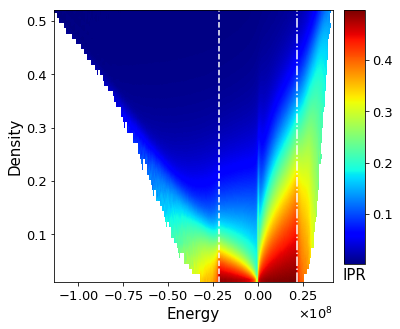

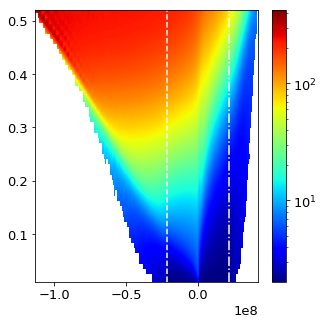

In [58]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel("Energy", fontsize=15)
ax.set_ylabel("Density", fontsize=15)
ax.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)


im = ax.imshow(bin_means_ipr, extent=[x_min,x_max,min(densities),max(densities)], cmap="jet",
               origin='lower',interpolation="bilinear")

ax.set_aspect("auto")
cax = fig.add_axes([ax.get_position().x1+0.03,ax.get_position().y0+0.05,0.06,ax.get_position().height-0.05])
fig.colorbar(im,cax = cax, cmap="Blues")
cax.set_xlabel("IPR", fontsize=15)


ax.vlines(-1*-2.72*10**9/5**3, 0.01,0.52, color="white", linestyle="-.")
ax.vlines(1*-2.72*10**9/5**3, 0.01,0.52, color="white", linestyle="--")

#fig.savefig("figures/Eigenstates/IPR_binned_all.png")



# Pr sieht genauso aus.
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(bin_means_pr, extent=[x_min,x_max,min(densities),max(densities)], cmap="jet",
               origin='lower',norm=matplotlib.colors.LogNorm(),interpolation="bilinear")
fig.colorbar(im, ax=ax)
ax.set_aspect("auto")
ax.vlines(-1*-2.72*10**9/5**3, 0.01,0.52, color="white", linestyle="-.")
ax.vlines(1*-2.72*10**9/5**3, 0.01,0.52, color="white", linestyle="--")


# 4. Ratios

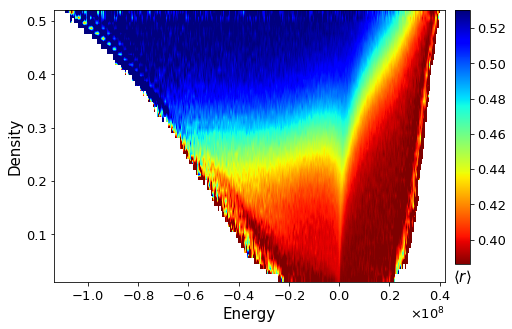

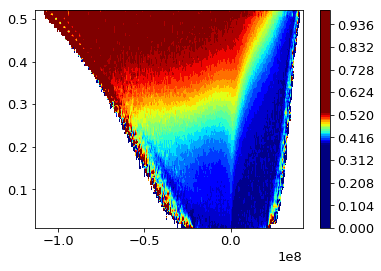

In [102]:
from matplotlib import cm

fig, ax = plt.subplots(figsize=(7,5))

ax.set_xlabel("Energy", fontsize=15)
ax.set_ylabel("Density", fontsize=15)
ax.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)

v = np.linspace(0.386, 0.53, 10, endpoint=True)
#im = ax.contourf(bin_edges_ratios[:-1],densities,bin_means_ratios,v,cmap=cm.jet_r,extend='both')
im = ax.imshow(bin_means_ratios, extent=[x_min,x_max,min(densities),max(densities)], cmap=cm.jet_r,
               origin='lower',interpolation="bilinear", vmin=0.386, vmax=0.53)
ax.set_aspect("auto")
cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0+0.05,0.03,ax.get_position().height-0.05])

fig.colorbar(im,cax = cax, cmap="Blues")
cax.set_xlabel(r"$\langle r \rangle$", fontsize=15)



fig.savefig("figures/Eigenstates/Ratios_binned_all.png",bbox_inches = "tight")


plt.show()
plt.contourf(bin_edges_ratios[:-1],densities,bin_means_ratios,cmap='jet', levels=150, vmax=0.53, vmin=0.386)
plt.colorbar()

# IPR Plotting

#### density 0.01

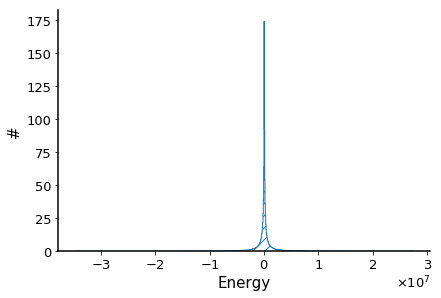

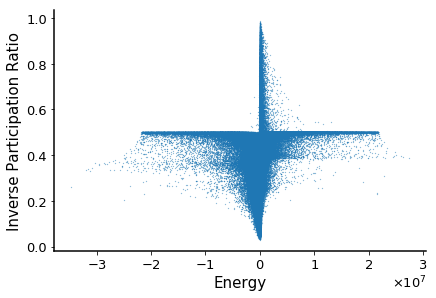

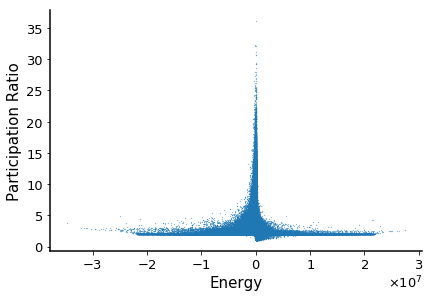

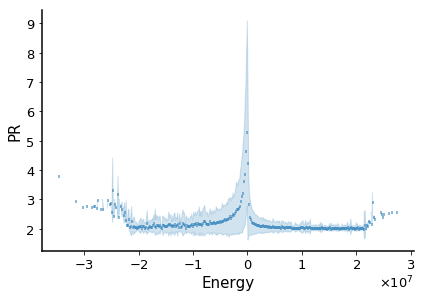

In [120]:
plot=0

fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)


axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
#axes.ticklabel_format(axis="y", style="scientific",scilimits=(0,0),useMathText=True)

axes.hist(eigenvalues[plot],bins=1000,histtype='step', hatch="//", weights=np.ones_like(eigenvalues[plot])/iteration)  
    
 
axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("#",fontsize=15);

fig.savefig("figures/Eigenstates/DOS_001.png",bbox_inches = "tight")#, dpi=1200)


#----------------------------------------------------------------------------------------------------------

fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)


axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
#axes.ticklabel_format(axis="y", style="scientific",scilimits=(0,0),useMathText=True)
    
    
axes.errorbar(eigenvalues[plot],ipr[plot], linestyle="None", marker=".", markersize=0.4) ;   
axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("Inverse Participation Ratio",fontsize=15);

fig.savefig("figures/Eigenstates/IPR_001.png",bbox_inches = "tight")#, dpi=1200)

    
#------------------------------------------------------------------------------------------------------


fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)


axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
#axes.ticklabel_format(axis="y", style="scientific",scilimits=(0,0),useMathText=True)
    

axes.errorbar(eigenvalues[plot],1/ipr[plot], linestyle="None", marker=".",markersize=0.4) ;   
axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("Participation Ratio",fontsize=15);

fig.savefig("figures/Eigenstates/PR_001.png",bbox_inches = "tight")#, dpi=1200)


#--------------------------------------------------------------------------------------------------------
fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
#plt.setp(axes[plot].get_xticklabels(), visible=False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)

axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)

bin_means, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                1/ipr[plot], statistic='mean', bins=500)
bin_std, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                1/ipr[plot], statistic='std', bins=500)


axes.fill_between(bin_edges[1:], bin_means-bin_std, bin_means+bin_std,color="C0", alpha=0.2)
axes.hlines(bin_means, bin_edges[:-1], bin_edges[1:], lw=3, color="C0",
           label='binned statistic of data')

axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("PR",fontsize=15);

### density 0.1

In [121]:
densities[9]

0.09999999999999999

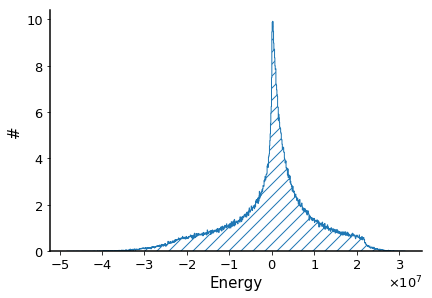

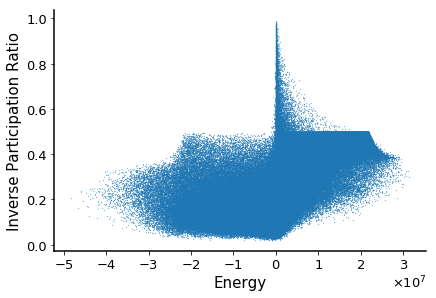

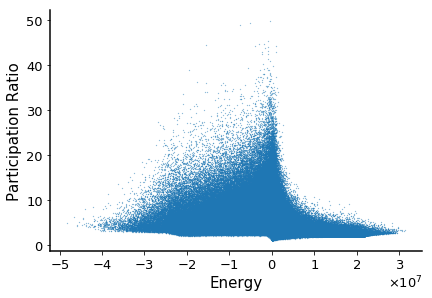

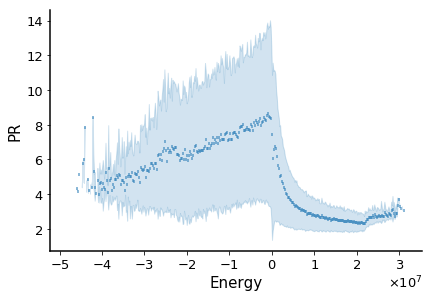

In [122]:
plot=9


fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)


axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
#axes.ticklabel_format(axis="y", style="scientific",scilimits=(0,0),useMathText=True)

axes.hist(eigenvalues[plot],bins=1000,histtype='step', hatch="//", weights=np.ones_like(eigenvalues[plot])/iteration)
    
 
axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("#",fontsize=15);
fig.savefig("figures/Eigenstates/DOS_01.png",bbox_inches = "tight")#, dpi=1200)


#----------------------------------------------------------------------------------------------------------



fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)


axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
#axes.ticklabel_format(axis="y", style="scientific",scilimits=(0,0),useMathText=True)
    
    
axes.errorbar(eigenvalues[plot],ipr[plot], linestyle="None", marker=".", markersize=0.4) ;   
axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("Inverse Participation Ratio",fontsize=15);

fig.savefig("figures/Eigenstates/IPR_01.png",bbox_inches = "tight")#, dpi=1200)

    
#------------------------------------------------------------------------------------------------------


fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)


axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
#axes.ticklabel_format(axis="y", style="scientific",scilimits=(0,0),useMathText=True)
    

axes.errorbar(eigenvalues[plot],1/ipr[plot], linestyle="None", marker=".",markersize=0.4) ;   
axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("Participation Ratio",fontsize=15);

fig.savefig("figures/Eigenstates/PR_01.png",bbox_inches = "tight")#, dpi=1200)


#---------------------------------------------------------------------------------------------------------
fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
#plt.setp(axes[plot].get_xticklabels(), visible=False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)

axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)

bin_means, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                1/ipr[plot], statistic='mean', bins=500)
bin_std, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                1/ipr[plot], statistic='std', bins=500)


axes.fill_between(bin_edges[1:], bin_means-bin_std, bin_means+bin_std,color="C0", alpha=0.2)
axes.hlines(bin_means, bin_edges[:-1], bin_edges[1:], lw=3, color="C0",
           label='binned statistic of data')

axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("PR",fontsize=15);

### density 0.2

In [123]:
print(densities[19])

0.2


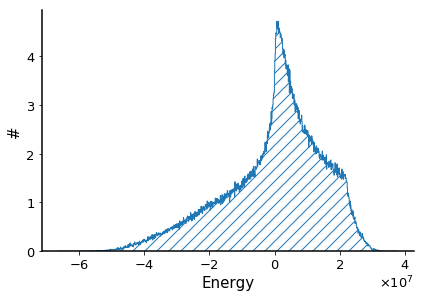

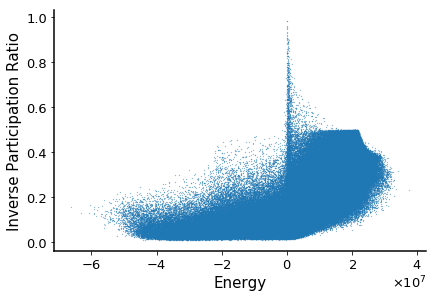

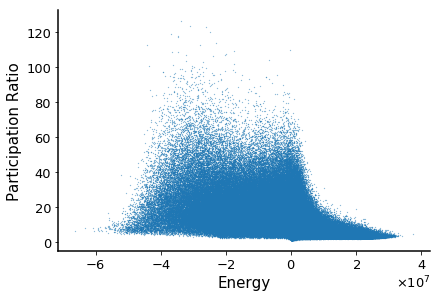

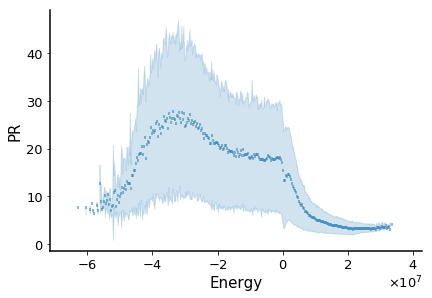

In [124]:
plot=19


fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)


axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
#axes.ticklabel_format(axis="y", style="scientific",scilimits=(0,0),useMathText=True)

axes.hist(eigenvalues[plot],bins=1000,histtype='step', hatch="//", weights=np.ones_like(eigenvalues[plot])/iteration)
    
 
axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("#",fontsize=15);


#----------------------------------------------------------------------------------------------------------





fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)


axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
#axes.ticklabel_format(axis="y", style="scientific",scilimits=(0,0),useMathText=True)
    
    
axes.errorbar(eigenvalues[plot],ipr[plot], linestyle="None", marker=".", markersize=0.4) ;   
axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("Inverse Participation Ratio",fontsize=15);
          
    
#------------------------------------------------------------------------------------------------------


fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)


axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
#axes.ticklabel_format(axis="y", style="scientific",scilimits=(0,0),useMathText=True)
    

axes.errorbar(eigenvalues[plot],1/ipr[plot], linestyle="None", marker=".",markersize=0.4) ;   
axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("Participation Ratio",fontsize=15);

#-----------------------------------------------------------------------------------------------------------

fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
#plt.setp(axes[plot].get_xticklabels(), visible=False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)

axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)

bin_means, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                1/ipr[plot], statistic='mean', bins=500)
bin_std, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                1/ipr[plot], statistic='std', bins=500)


axes.fill_between(bin_edges[1:], bin_means-bin_std, bin_means+bin_std,color="C0", alpha=0.2)
axes.hlines(bin_means, bin_edges[:-1], bin_edges[1:], lw=3, color="C0",
           label='binned statistic of data')

axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("PR",fontsize=15);

### density 0.52

In [125]:
print(densities[51])

0.52


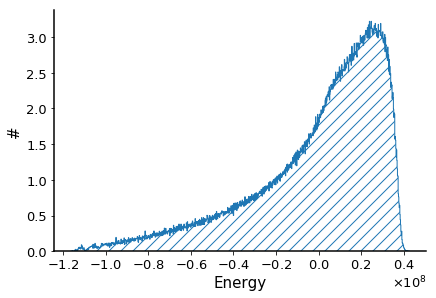

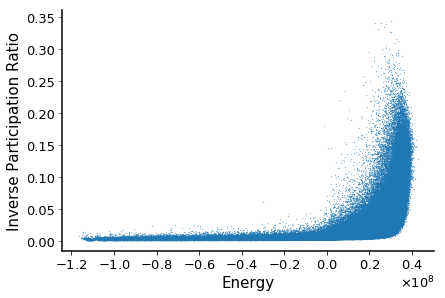

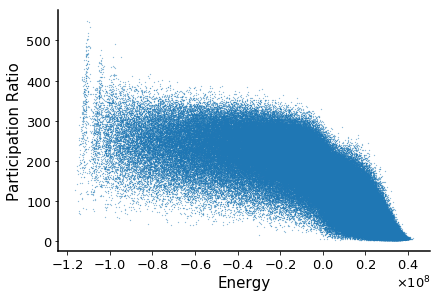

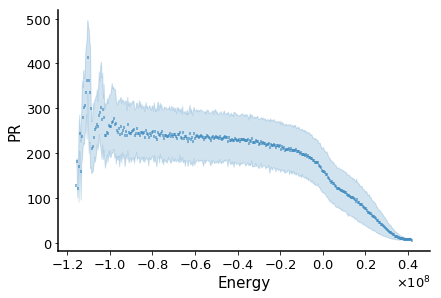

In [126]:
plot=51


fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)


axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
#axes.ticklabel_format(axis="y", style="scientific",scilimits=(0,0),useMathText=True)

axes.hist(eigenvalues[plot],bins=1000,histtype='step', hatch="//", weights=np.ones_like(eigenvalues[plot])/iteration)
 
axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("#",fontsize=15);

fig.savefig("figures/Eigenstates/DOS_052.png",bbox_inches = "tight")#, dpi=1200)


#----------------------------------------------------------------------------------------------------------



fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)


axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
#axes.ticklabel_format(axis="y", style="scientific",scilimits=(0,0),useMathText=True)
    
    
axes.errorbar(eigenvalues[plot],ipr[plot], linestyle="None", marker=".", markersize=0.4) ;   
axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("Inverse Participation Ratio",fontsize=15);
       
fig.savefig("figures/Eigenstates/IPR_052.png",bbox_inches = "tight")#, dpi=1200)

    
#------------------------------------------------------------------------------------------------------


fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)


axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)
#axes.ticklabel_format(axis="y", style="scientific",scilimits=(0,0),useMathText=True)
    

axes.errorbar(eigenvalues[plot],1/ipr[plot], linestyle="None", marker=".",markersize=0.4) ;   
axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("Participation Ratio",fontsize=15);

fig.savefig("figures/Eigenstates/PR_052.png",bbox_inches = "tight")#, dpi=1200)


#----------------------------------------------------------------------------------------------------------

fig, axes = plt.subplots(1,1)#, figsize=(13,18))  
plt.tight_layout()  
#axes.set_xscale("log")
#axes.set_yscale("log")

axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
#plt.setp(axes[plot].get_xticklabels(), visible=False)
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(1.5)

axes.ticklabel_format(axis="x", style="scientific",scilimits=(0,0),useMathText=True)wei

bin_means, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                1/ipr[plot], statistic='mean', bins=500)
bin_std, bin_edges, binnumber = stats.binned_statistic(eigenvalues[plot],
                1/ipr[plot], statistic='std', bins=500)


axes.fill_between(bin_edges[1:], bin_means-bin_std, bin_means+bin_std,color="C0", alpha=0.2)
axes.hlines(bin_means, bin_edges[:-1], bin_edges[1:], lw=3, color="C0",
           label='binned statistic of data')

axes.set_xlabel("Energy",fontsize=15)
axes.set_ylabel("PR",fontsize=15);


# Ratios